In [ ]:
# https://www.kaggle.com/c/titanic/overview

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
submission_example = pd.read_csv("./gender_submission.csv")

In [3]:
submission_example.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [4]:
# Survived : 0 = no, 1 = yes
# Pclass : 1 = 1st, 2 = 2nd, 3 = 3rd
# Embarked : C = Cherbourg, Q = Queenstown, S = Southampton

In [5]:
# pclass: A proxy for socio-economic status (SES)
# 1st = Upper
# 2nd = Middle
# 3rd = Lower

# age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

# sibsp: The dataset defines family relations in this way...
# Sibling = brother, sister, stepbrother, stepsister
# Spouse = husband, wife (mistresses and fiancés were ignored)

# parch: The dataset defines family relations in this way...
# Parent = mother, father
# Child = daughter, son, stepdaughter, stepson
# Some children travelled only with a nanny, therefore parch=0 for them.

In [6]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
# Age, Cabin, Embarked의 nan값은 어떻게 처리할 것인가..? test에선 Fare도..?

# Age는 mean값
# Cabin은 nan이 너무 많아서 버린다..?
# Embarked는 mode값

# test의 Fare 1개 nan값은 fare의 mean값

# 각각 이렇게 처리..

# Age는 10대, 20대 와 같이 나이대로 처리하여 구분지어보자(nan값보다 나중에 처리할 예정)
# 각 나이를 하나하나 다 처리하기엔 나이가 다양하고 숫자가 너무 제각각..

In [11]:
train["Age"].fillna(train["Age"].mean(), inplace = True)
test["Age"].fillna(test["Age"].mean(), inplace = True)

train.drop(labels = ["Cabin"], axis = 1, inplace = True)
test.drop(labels = ["Cabin"], axis = 1, inplace = True)

train["Embarked"].fillna(train["Embarked"].mode()[0], inplace = True)
test["Embarked"].fillna(test["Embarked"].mode()[0], inplace = True)

test["Fare"].fillna(test["Fare"].mean(), inplace = True)

In [12]:
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,"Nirva, Mr. Iisakki Antino Aijo",male,NaN,NaN,NaN,CA. 2343,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,646
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.002015,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,29.699118,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


In [13]:
test.describe(include = "all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,418.000000,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,3
top,NaN,NaN,"Willard, Miss. Constance",male,NaN,NaN,NaN,PC 17608,NaN,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN
std,120.810458,0.841838,NaN,NaN,12.634534,0.896760,0.981429,NaN,55.840500,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN
25%,996.250000,1.000000,NaN,NaN,23.000000,0.000000,0.000000,NaN,7.895800,NaN
50%,1100.500000,3.000000,NaN,NaN,30.272590,0.000000,0.000000,NaN,14.454200,NaN
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN


Survived = 0 : 549,    Survived = 1 : 342


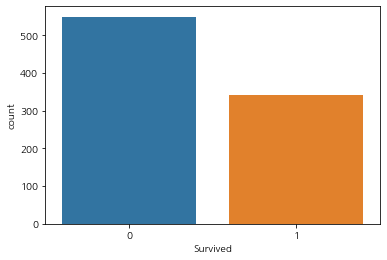

In [14]:
print("Survived = 0 : {},    Survived = 1 : {}".format(len(train[train["Survived"] == 0]),
                                                       len(train[train["Survived"] == 1])))

sns.countplot("Survived", data = train)
plt.show()

In [15]:
pclass_survived = pd.crosstab(index = train["Pclass"], columns = train["Survived"], margins = True)

# Pclass = 1  생존률
class1_survived = pclass_survived[1][1] / pclass_survived["All"][1]

# Pclass = 2  생존률
class2_survived = pclass_survived[1][2] / pclass_survived["All"][2]

# Pclass = 3  생존률
class3_survived = pclass_survived[1][3] / pclass_survived["All"][3]

print("""Pclass 1 생존율 : {}
Pclass 2 생존율 : {}
Pclass 3  생존율 : {}""".format(class1_survived, class2_survived, class3_survived))

# Pclass에 따라 생존률이 달라짐

Pclass 1 생존율 : 0.6296296296296297
Pclass 2 생존율 : 0.47282608695652173
Pclass 3  생존율 : 0.24236252545824846


In [16]:
pclass_survived

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [17]:
sex_total = train[["Sex", "Survived"]].groupby(by = "Sex").count()
female_total = sex_total["Survived"]["female"]
male_total = sex_total["Survived"]["male"]

sex_survived = train.pivot_table(values = "Survived", index = "Sex", aggfunc = "sum")
female_survived = sex_survived["Survived"]["female"]
male_survived = sex_survived["Survived"]["male"]

male_survived_ratio = male_survived / male_total
female_survived_ratio = female_survived / female_total

print("""남성 생존율 : {}
여성 생존율 : {}""".format(male_survived_ratio, female_survived_ratio))

# 여성의 생존율이 더 높음

남성 생존율 : 0.18890814558058924
여성 생존율 : 0.7420382165605095


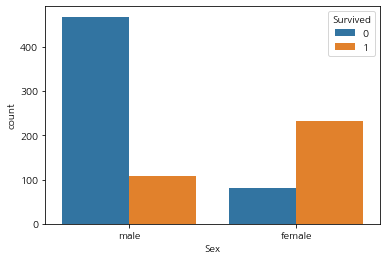

In [18]:
sns.countplot("Sex", data = train, hue = "Survived")
plt.show()

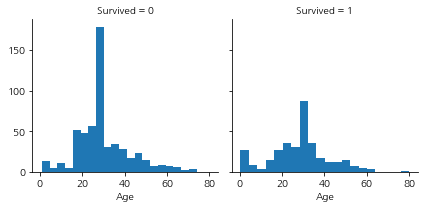

In [19]:
g = sns.FacetGrid(train, col = "Survived")
g.map(plt.hist, "Age", bins = 20)
plt.show()

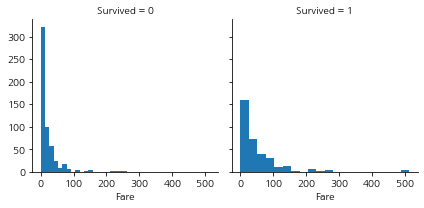

In [20]:
g = sns.FacetGrid(train, col = "Survived")
g.map(plt.hist, "Fare", bins = 20)
plt.show()

In [ ]:
# 10세 미만, 10대, 20대.... 이런식으로 나이대를 구분짓기로..!
#  0~9세는 0, 10~19세는 1, 20~29세는 2 이런식으로 바꿔줌.

In [28]:
train["Ageband"] = pd.cut(train["Age"], bins = range(0, 81, 10), right = False, labels = range(0, 8))
test["Ageband"] = pd.cut(test["Age"], bins = range(0, 81, 10), right = False, labels = range(0, 8))

# 80세는 label = 7로 처리
train["Ageband"].fillna(value = 7, inplace = True)

In [29]:
train[["Ageband", "Survived"]].groupby("Ageband", as_index = False).mean()

,Ageband,Survived
0,0,0.612903
1,1,0.401961
2,2,0.324937
3,3,0.437126
4,4,0.382022
5,5,0.416667
6,6,0.315789
7,7,0.142857


In [ ]:
# Fare도 나이와 비슷하게 10단위로 끊어서 구분해보자
# Fare의 경우 0~100 사이에 838건의 data가 있고 100이상으로는 53건
# 0~100은 10단위로 끊고 그이상은 하나로묶어서

In [30]:
train["Fareband"] = pd.cut(train["Fare"], bins = range(0, 101, 10), right = False, labels = range(0, 10))
train["Fareband"] = train["Fareband"].cat.add_categories(10)
train["Fareband"].fillna(value = 10, inplace = True)

test["Fareband"] = pd.cut(test["Fare"], bins = range(0, 101, 10), right = False, labels = range(0, 10))
test["Fareband"] = test["Fareband"].cat.add_categories(10)
test["Fareband"].fillna(value = 10, inplace = True)

# 바로 3번째줄을 쓰지 못한건..ValueError: fill value must be in categories
# 이런 에러가 떠서..구글 검색..

In [ ]:
# Sex column 숫자로 바꾸자..
# male : 0, female : 1

# Embarked column도 숫자로 바꾸자
# S : 0, C : 1, Q : 2

In [31]:
train.replace({"Sex" : {"male" : 0, "female" : 1}, "Embarked" : {"S" : 0, "C" : 1, "Q" : 2}},
              inplace = True)

test.replace({"Sex" : {"male" : 0, "female" : 1}, "Embarked" : {"S" : 0, "C" : 1, "Q" : 2}},
              inplace = True)

In [ ]:
# SibSp, Parch, Survived
# 일단은 있는 그대로..사용해볼까?

In [32]:
train[["SibSp", "Survived"]].groupby("SibSp", as_index = False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [33]:
train[["Parch", "Survived"]].groupby("Parch", as_index = False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [34]:
# train/test에서 input으로 사용하지 않을 column들 drop

train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ageband,Fareband
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.00,0,2,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.00,0,1,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.45,0,2,2
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.00,1,2,3
890,891,0,3,"Dooley, Mr. Patrick",0,32.000000,0,0,370376,7.75,2,3,0


In [35]:
train.drop(labels = ["Name", "Age", "Ticket", "Fare"], axis = 1, inplace = True)
test.drop(labels = ["Name", "Age", "Ticket", "Fare"], axis = 1, inplace = True)

In [36]:
train.tail()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Ageband,Fareband
886,887,0,2,0,0,0,0,2,1
887,888,1,1,1,0,0,0,1,3
888,889,0,3,1,1,2,0,2,2
889,890,1,1,0,0,0,1,2,3
890,891,0,3,0,0,0,2,3,0


In [37]:
test.tail()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Ageband,Fareband
413,1305,3,0,0,0,0,3,0
414,1306,1,1,0,0,1,3,10
415,1307,3,0,0,0,0,3,0
416,1308,3,0,0,0,0,3,0
417,1309,3,0,1,1,1,3,2


In [ ]:
# logistics regression, random forest, LightGBM을 활용해보자
# cross validation 활용해서 셋 중 가장 성능이 좋은 모델로 제출할 것

In [38]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(train, test_size = 0.3, random_state = 0)
df_train.shape, df_test.shape

((623, 9), (268, 9))

In [39]:
input_columns = ["Pclass", "Sex", "SibSp", "Parch", "Embarked", "Ageband", "Fareband"]

x_train = df_train[input_columns] 
y_train = df_train["Survived"]
x_test = df_test[input_columns]
y_test = df_test["Survived"]

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
model_logistic = LogisticRegression().fit(x_train, y_train)

In [51]:
y_pred_logistic = model_logistic.predict(x_test)

In [63]:
accuracy_logistic = (y_test == y_pred_logistic).sum() / len(y_test) * 100
accuracy_logistic

80.59701492537313

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
model_randomforest = RandomForestClassifier(n_estimators = 100, random_state = 0).fit(x_train, y_train)

In [56]:
y_pred_randomforest = model_randomforest.predict(x_test)

In [64]:
accuracy_randomforest = (y_test == y_pred_randomforest).sum() / len(y_test) * 100
accuracy_randomforest

81.34328358208955

In [60]:
import lightgbm

In [61]:
model_lgbm = lightgbm.LGBMClassifier(n_estimators = 100,
                                     max_depth = -1,
                                     random_state = 0).fit(x_train, y_train)

In [62]:
y_pred_lgbm = model_lgbm.predict(x_test)

In [65]:
accuracy_lgbm = (y_test == y_pred_lgbm).sum() / len(y_test) * 100
accuracy_lgbm

81.71641791044776

In [ ]:
# 미세하게 lgbm이 높으므로 lgbm으로 submission csv 만들어서 제출해보자

In [67]:
output = model_lgbm.predict(test[input_columns])

In [69]:
test["Survived"] = output

In [71]:
test.tail()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Ageband,Fareband,Survived
413,1305,3,0,0,0,0,3,0,0
414,1306,1,1,0,0,1,3,10,1
415,1307,3,0,0,0,0,3,0,0
416,1308,3,0,0,0,0,3,0,0
417,1309,3,0,1,1,1,3,2,0


In [72]:
test.drop(labels = input_columns, axis = 1, inplace = True)

In [74]:
test.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [75]:
test.to_csv("./submission/submission.csv", index = False)

<img src = "./submission/result.png">

- 제출 시점 23678팀 중 6837등 기록 (약 상위 16%)
- SibSp, Parch column에 대해서 많이 고민안해봄..
- 기존의 column들을 활용하여 새로운 column을 만들어서 활용해볼 수 있으나 시도하지는 않음
- naive bayes classifier, SVM 등 다양한 더 다양한 알고리즘을 활용해보지 않음. (더 나은 알고리즘이 있을지도!)
- 사용한 lightgbm 알고리즘에 대해서도 parameter tuning을 거치지 않음.
- 짬나는 시간에 생각나는 대로 진행한거 치고는 괜찮은 결과물인듯..
